In [1]:
import variational_bayes as vb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean = 5
precision = 0.5
n = 100

x = np.random.normal(0, 1, n) / np.sqrt(precision) + mean

In [3]:
q_mean = vb.NormalDistribution(0, 1e-3)
q_precision = vb.GammaDistribution(1e-3, 1e-3)
likelihood = vb.NormalLikelihood(x, q_mean, q_precision)

model = vb.Model({'mean': q_mean, 'precision': q_precision}, [likelihood])
model.elbo

-102126.47422528418

In [4]:
elbo = model.update(100)

Mean     : 5.068728 +- 0.130272
Precision: 0.589245 +- 0.082511


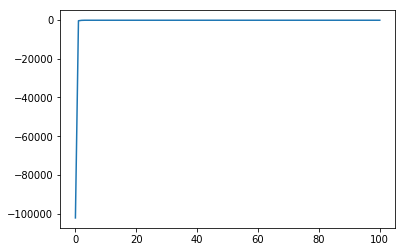

In [5]:
plt.plot(elbo)
print("Mean     : %f +- %f" % (model['mean'].mean, model['mean'].std))
print("Precision: %f +- %f" % (model['precision'].mean, model['precision'].std))

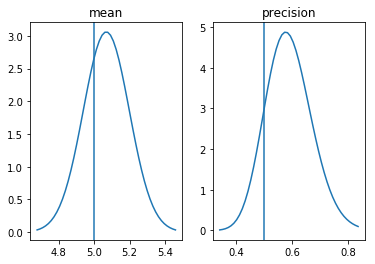

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
vb.plot_proba(q_mean, reference=mean, ax=ax1)
vb.plot_proba(q_precision, reference=precision, ax=ax2)
ax1.set_title('mean')
ax2.set_title('precision')